# The interaction between bacteria growth and bio-surfactant production
##### -Ye Seo Park
#### Final Math Project

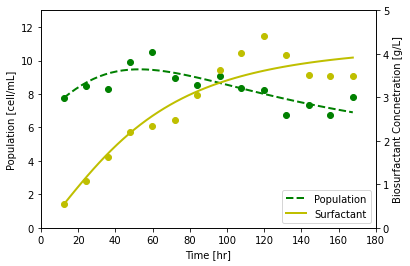

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

#Load the data
df = pd.read_csv("BBG.csv")

#Article Model
def f(v,t):
    m1 = 2.8*10**-2 #1/h
    K0 = 15.7
    r = 4.72*10**-3 #1/h
    m2 = 7.88*10**-3 #1/h
    q = 1.86*10**-3 #1/h
    P = v[0]
    S = v[1]
    dPdt = m1*P - (m1/K0)*P**2 - r*P*S
    dSdt = m2*P -q*P*S
    return [dPdt, dSdt]

t = np.linspace(12.32,167.67)
v0=[7.77,0.54]

#Plot the data and the model equation 
v = odeint(f,v0,t)
fig, ax1 = plt.subplots()
ax1.scatter(df["Time"], df["Population"], c='g')
line1 = ax1.plot(t,v[:,0],'g--', linewidth=2.0, label ='Population')
ax2 = ax1.twinx()
ax2.scatter(df["Time"], df["Surfactant"], c='y')
line2 = ax2.plot(t,v[:,1],'y-', linewidth=2.0, label ='Surfactant')
ax1.set_xlabel("Time [hr]")
ax1.set_xlim([0,180])
ax1.set_ylabel("Population [cell/mL]")
ax1.set_ylim([0, 13]) 
ax2.set_ylabel("Biosurfactant Concnetration [g/L]")
ax2.set_ylim([0, 5]) 
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc = 'lower right')
plt.show()

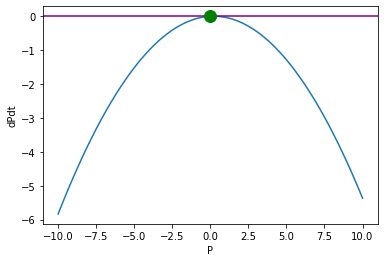

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

#To see where is the steady state and stability in terms of P (setting K0 is .5)
def dPdt(P):
    K0 = .5
    dPdt = 2.8*10**-2*P - (2.8*10**-2/K0)*P**2 - 4.72*10**-3*P
    return dPdt

P_values = np.linspace(-10,10,100)

dPdt_values = []
for m in P_values:
    dPdt_values.append(dPdt(m))

# plot derivative
plt.xlabel("P");
plt.ylabel("dPdt");
plt.ylim()
plt.plot(P_values,dPdt_values);
plt.axhline(y=0, xmin=0, xmax=1,color = 'purple')
plt.plot([0],[0], color='green', marker = 'o', linestyle = 'none',markersize=12);


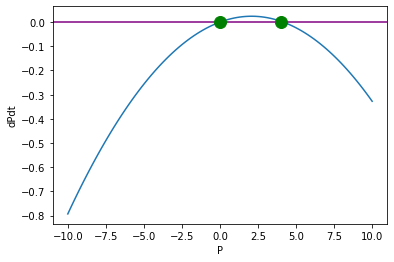

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

#To see where is the steady state and stability in terms of P (setting K0 is 5)
def dPdt(P):
    K0 = 5
    dPdt = 2.8*10**-2*P - (2.8*10**-2/K0)*P**2 - 4.72*10**-3*P
    return dPdt

P_values = np.linspace(-10,10,100)

dPdt_values = []
for m in P_values:
    dPdt_values.append(dPdt(m))

# plot derivative
plt.xlabel("P");
plt.ylabel("dPdt");
plt.ylim()
plt.plot(P_values,dPdt_values);
plt.axhline(y=0, xmin=0, xmax=1,color = 'purple')
plt.plot([0],[0], [4],[0], color='green', marker = 'o', linestyle = 'none',markersize=12);



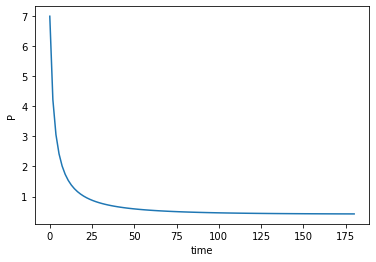

In [8]:
#Plot the bacteria growth versus time to see the behaviors of steady state.
def dPdt(P,t):
    K0 = .5
    dPdt = 2.8*10**-2*P - (2.8*10**-2/K0)*P**2 - 4.72*10**-3*P
    return dPdt

from scipy.integrate import odeint

timesteps = np.linspace(0,180,100)

P0 = 7
P = odeint(dPdt, P0, timesteps)

plt.xlabel("time")
plt.ylabel("P")
plt.plot(timesteps, P);

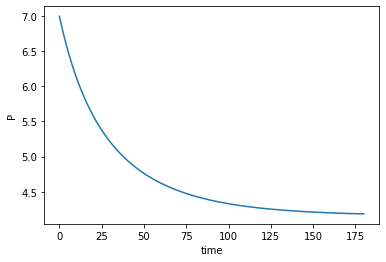

In [9]:
#Plot the bacteria growth versus time to see the behaviors of steady state.
def dPdt(P,t):
    K0 = 5
    dPdt = 2.8*10**-2*P - (2.8*10**-2/K0)*P**2 - 4.72*10**-3*P
    return dPdt

from scipy.integrate import odeint

timesteps = np.linspace(0,180,100)

P0 = 7
P = odeint(dPdt, P0, timesteps)

plt.xlabel("time")
plt.ylabel("P")
plt.plot(timesteps, P);

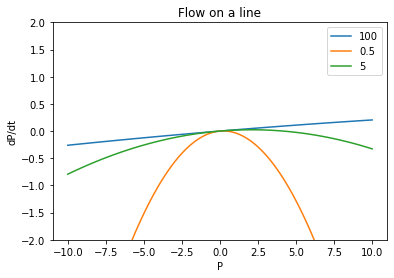

In [14]:
#Draw flow line to see wheter the steady state is same or different with various K0.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

def dPdt(P,K0):
    dPdt = 2.8*10**-2*P - (2.8*10**-2/K0)*P**2 - 4.72*10**-3*P
    return dPdt

K0 = [100,.5,5] 
P_values = np.linspace(-10,10,100)

for n in K0:
    dPdt_values = []
    for m in P_values:
        dPdt_values.append(dPdt(m,n))
    
    plt.xlabel("P")
    plt.ylabel("dP/dt")
    plt.title("Flow on a line")
    plt.ylim(-2, 2) # zoom in as necessary
    plt.plot(P_values,dPdt_values)

plt.legend(labels = K0)

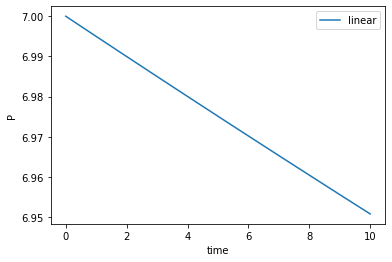

In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt

#Linearization at (0,0)
def linear(P,t):
    linear = 2.8*10**-2 + - 4.72*10**-3*(P-0)
    return linear

from scipy.integrate import odeint

timesteps = np.linspace(0,10,100)

P0 = 7
P = odeint(linear, P0, timesteps)


plt.xlabel("time")
plt.ylabel("P")
plt.plot(timesteps, P, label = 'linear');

plt.legend()

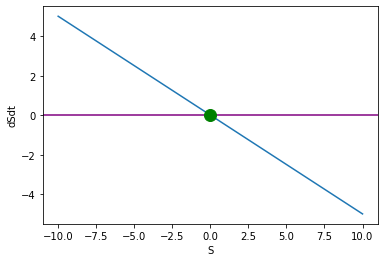

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

#To see where is the steady state and stability in terms of S (setting q is .5)
def dSdt(S):
    q = .5
    dSdt = 7.88*10**-3 -q*S
    return dSdt

S_values = np.linspace(-10,10,100)

dSdt_values = []
for m in S_values:
    dSdt_values.append(dSdt(m))

# plot derivative
plt.xlabel("S");
plt.ylabel("dSdt");
plt.ylim()
plt.plot(S_values,dSdt_values);
plt.axhline(y=0, xmin=0, xmax=1,color = 'purple')
plt.plot([0],[0], color='green', marker = 'o', linestyle = 'none',markersize=12);



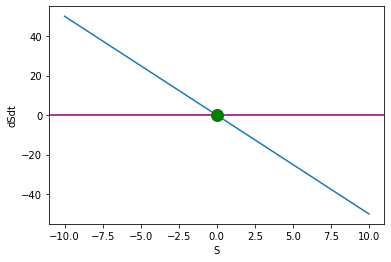

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

#To see where is the steady state and stability in terms of S (setting q is 5)
def dSdt(S):
    q = 5
    dSdt = 7.88*10**-3 -q*S
    return dSdt

S_values = np.linspace(-10,10,100)

dSdt_values = []
for m in S_values:
    dSdt_values.append(dSdt(m))

# plot derivative
plt.xlabel("S");
plt.ylabel("dSdt");
plt.ylim()
plt.plot(S_values,dSdt_values);
plt.axhline(y=0, xmin=0, xmax=1,color = 'purple')
plt.plot([0],[0], color='green', marker = 'o', linestyle = 'none',markersize=12);

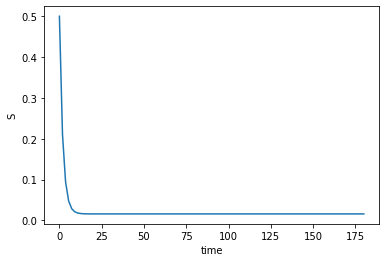

In [12]:
#Plot the biosurfactant production versus time to see the behaviors of steady state.
def dSdt(S,q):
    q = .5
    dSdt = 7.88*10**-3 -q*S
    return dSdt


from scipy.integrate import odeint

timesteps = np.linspace(0,180,100)

S0 = 0.5
S = odeint(dSdt, S0, timesteps)

plt.xlabel("time")
plt.ylabel("S")
plt.plot(timesteps, S);

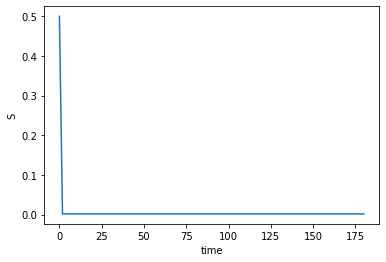

In [13]:
#Plot the biosurfactant production versus time to see the behaviors of steady state.
def dSdt(S,q):
    q = 5
    dSdt = 7.88*10**-3 -q*S
    return dSdt


from scipy.integrate import odeint

timesteps = np.linspace(0,180,100)

S0 = 0.5
S = odeint(dSdt, S0, timesteps)

plt.xlabel("time")
plt.ylabel("S")
plt.plot(timesteps, S);

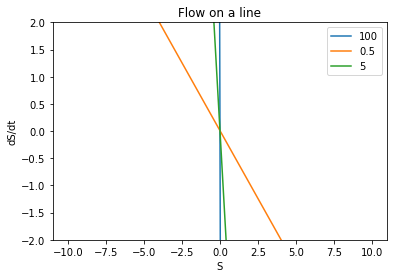

In [15]:
#Draw flow line to see wheter the steady state is same or different with various q.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

#Flow line
def dSdt(S,q):
    dSdt = 7.88*10**-3 -q*S
    return dSdt

q = [100,.5,5] 
S_values = np.linspace(-10,10,100)

for n in q:
    dSdt_values = []
    for m in S_values:
        dSdt_values.append(dSdt(m,n))
    
    plt.xlabel("S")
    plt.ylabel("dS/dt")
    plt.title("Flow on a line")
    plt.ylim(-2, 2) # zoom in as necessary
    plt.plot(S_values,dSdt_values)

plt.legend(labels = q)

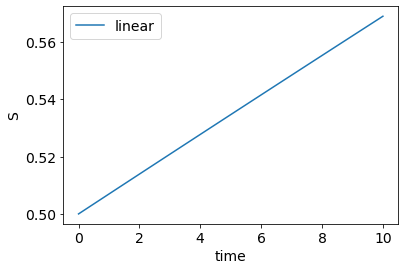

In [80]:
import numpy as np
import math
import matplotlib.pyplot as plt

#Linearization at (0,0)

def linear(S,t):
    linear = 7.88*10**-3 - 1.86*10**-3*(S-0)
    return linear

from scipy.integrate import odeint

timesteps = np.linspace(0,10,100)

S0 = 0.5
S = odeint(linear, S0, timesteps)


plt.xlabel("time")
plt.ylabel("S")
plt.plot(timesteps, S, label = 'linear');

plt.legend()

-0.0031307617834395035 0.009498600000000003


Text(0, 0.5, 'dSdt')

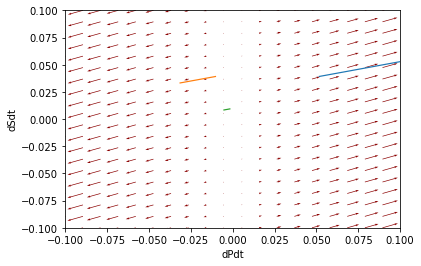

In [30]:
# Drawing Phase Portrait to see the steady state with the e
import numpy as np
from scipy.integrate import odeint 
import matplotlib.pyplot as plt
%matplotlib inline
from plotdf import plotdf

def f(x,m1 = 2.8*10**-2,K0 = 15.7,r = 4.72*10**-3,m2 = 7.88*10**-3, q = 1.86*10**-3):
    P,S = x
    P = x[0]
    S = x[1]

    return np.array([m1*P - (m1/K0)*P**2 - r*P*S, m2*P - q*P*S])

#Calculation in hand
m1 = 2.8*10**-2 #1/h
K0 = 15.7
r = 4.72*10**-3 #1/h
m2 = 7.88*10**-3 #1/h
q = 1.86*10**-3 #1/h
P = 6.75
S = 3.48
#(P,S) = (7.77, 0.54), (10.5,2.34), (6.75,3.48)
dPdt, dSdt = (m1*P - (m1/K0)*P**2 - r*P*S, m2*P - q*P*S)
print (dPdt,dSdt)

plotdf(f,
     np.array([-0.1,0.1]), 
     np.array([-0.1,0.1]), 
     [(0.09,0.05),(-0.018,0.037),(-0.003,0.009)],
     gridsteps=20,
     nsteps = 1000,
     tmax=20)

        
plt.xlabel("dPdt")
plt.ylabel("dSdt")

-0.0031307617834395035 0.009498600000000003


(array([0.   , 0.028]),
 array([[0.        , 0.96260613],
        [1.        , 0.27090487]]))

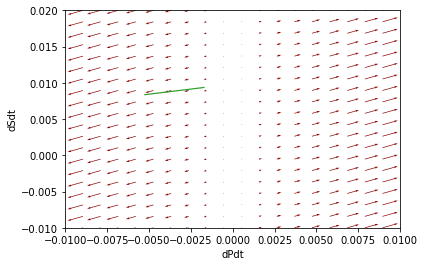

In [48]:
#Zoom the phase portrait.
import numpy as np
from scipy.integrate import odeint 
import matplotlib.pyplot as plt
%matplotlib inline
from plotdf import plotdf

def f(x,m1 = 2.8*10**-2,K0 = 15.7,r = 4.72*10**-3,m2 = 7.88*10**-3, q = 1.86*10**-3):
    P,S = x
    P = x[0]
    S = x[1]

    return np.array([m1*P - (m1/K0)*P**2 - r*P*S, m2*P - q*P*S])

#Calculation in hand
m1 = 2.8*10**-2 #1/h
K0 = 15.7
r = 4.72*10**-3 #1/h
m2 = 7.88*10**-3 #1/h
q = 1.86*10**-3 #1/h
P = 6.75
S = 3.48
#(P,S) = (7.77, 0.54), (10.5,2.34), (6.75,3.48)
dPdt, dSdt = (m1*P - (m1/K0)*P**2 - r*P*S, m2*P - q*P*S)
print (dPdt,dSdt)

plotdf(f,
     np.array([-0.01,0.01]), 
     np.array([-0.01,0.02]), 
     [(0.09,0.05),(-0.018,0.037),(-0.003,0.009)],
     gridsteps=20,
     nsteps = 1000,
     tmax=20)

        
plt.xlabel("dPdt")
plt.ylabel("dSdt")

#linearization at (0,0) and get the eigenvalue and eigenvector.
import numpy as np
from numpy import linalg as LA
a = np.array([[2.8*10**-2,0], [7.88*10**-3,0]])
LA.eig(a)

6.474353100294372


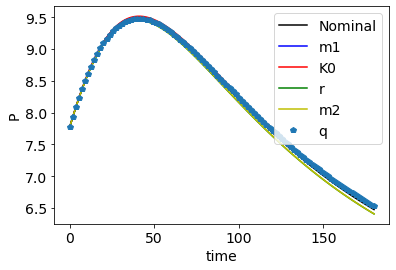

In [58]:
# Distinguish the parameter sensitivity with purtubation by 0.01 in bacteria growth
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

#m1 = 2.8*10**-2 #1/h
#K0 = 15.7
#r = 4.72*10**-3 #1/h
#m2 = 7.88*10**-3 #1/h
#q = 1.86*10**-3 #1/h

from scipy.integrate import odeint

# Define a function which calculates the derivative
def func(x,t, m1, K0, r, m2, q):    
    P,S = x;
    return [m1*P - m1/K0*P**2 - r*P*S, m2*P - q*P*S]


timesteps = np.linspace(0,180,100)
y0 = [7.77,0.54];

# Nominal
y = odeint(func, y0, timesteps, args = (2.8*10**-2,15.7,4.72*10**-3,7.88*10**-3,1.86*10**-3))
# Pertubation by 0.01
y1 = odeint(func, y0, timesteps, args = (2.8*10**-2*1.01,15.7,4.72*10**-3,7.88*10**-3,1.86*10**-3))
y2 = odeint(func, y0, timesteps, args = (2.8*10**-2,15.7*1.01,4.72*10**-3,7.88*10**-3,1.86*10**-3))
y3 = odeint(func, y0, timesteps, args = (2.8*10**-2,15.7,4.72*10**-3*1.01,7.88*10**-3,1.86*10**-3))
y4 = odeint(func, y0, timesteps, args = (2.8*10**-2,15.7,4.72*10**-3,7.88*10**-3*1.01,1.86*10**-3))
y5 = odeint(func, y0, timesteps, args = (2.8*10**-2,15.7,4.72*10**-3,7.88*10**-3,1.86*10**-3*1.01))


# Plot the numerical solution
plt.rcParams.update({'font.size': 14})
plt.xlabel("time")
plt.ylabel("P")
plt.plot(timesteps, y[:,0],'k', label = "Nominal");
plt.plot(timesteps, y1[:,0],'b', label = "m1");
plt.plot(timesteps, y2[:,0],'r', label = "K0");
plt.plot(timesteps, y3[:,0],'g', label = "r");
plt.plot(timesteps, y4[:,0],'y', label = "m2");
plt.plot(timesteps, y5[:,0],'p', label = "q");
plt.legend()

#Print the final value of P
print(y[-1,0])

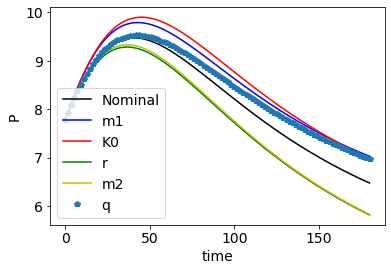

In [60]:
# Distinguish the parameter sensitivity with purtubation by 0.15 in bacteria growth
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

#m1 = 2.8*10**-2 #1/h
#K0 = 15.7
#r = 4.72*10**-3 #1/h
#m2 = 7.88*10**-3 #1/h
#q = 1.86*10**-3 #1/h

from scipy.integrate import odeint

# Define a function which calculates the derivative
def func(x,t, m1, K0, r, m2, q):    
    P,S = x;
    return [m1*P - (m1/K0)*P**2 - r*P*S, m2*P - q*P*S]


timesteps = np.linspace(0,180,100)
y0 = [7.77,0.54];

#nominal
y = odeint(func, y0, timesteps, args = (2.8*10**-2,15.7,4.72*10**-3,7.88*10**-3,1.86*10**-3))
#pertubation by 0.15
y1 = odeint(func, y0, timesteps, args = (2.8*10**-2*1.1,15.7,4.72*10**-3,7.88*10**-3,1.86*10**-3))
y2 = odeint(func, y0, timesteps, args = (2.8*10**-2,15.7*1.1,4.72*10**-3,7.88*10**-3,1.86*10**-3))
y3 = odeint(func, y0, timesteps, args = (2.8*10**-2,15.7,4.72*10**-3*1.1,7.88*10**-3,1.86*10**-3))
y4 = odeint(func, y0, timesteps, args = (2.8*10**-2,15.7,4.72*10**-3,7.88*10**-3*1.1,1.86*10**-3))
y5 = odeint(func, y0, timesteps, args = (2.8*10**-2,15.7,4.72*10**-3,7.88*10**-3,1.86*10**-3*1.1))


# Plot the numerical solution
plt.rcParams.update({'font.size': 14})
plt.xlabel("time")
plt.ylabel("P")
plt.plot(timesteps, y[:,0],'k', label = "Nominal");
plt.plot(timesteps, y1[:,0],'b', label = "m1");
plt.plot(timesteps, y2[:,0],'r', label = "K0");
plt.plot(timesteps, y3[:,0],'g', label = "r");
plt.plot(timesteps, y4[:,0],'y', label = "m2");
plt.plot(timesteps, y5[:,0],'p', label = "q");
plt.legend()

3.999216142003397


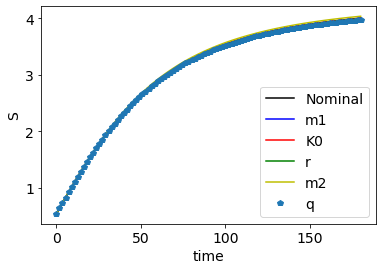

In [63]:
# Distinguish the parameter sensitivity with purtubation by 0.01 in biosurfactant production
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

#m1 = 2.8*10**-2 #1/h
#K0 = 15.7
#r = 4.72*10**-3 #1/h
#m2 = 7.88*10**-3 #1/h
#q = 1.86*10**-3 #1/h

from scipy.integrate import odeint

# Define a function which calculates the derivative
def func(x,t, m1, K0, r, m2, q):    
    P,S = x;
    return [m1*P - m1/K0*P**2 - r*P*S, m2*P - q*P*S]


timesteps = np.linspace(0,180,100)
y0 = [7.77,0.54];

# Nominal
y = odeint(func, y0, timesteps, args = (2.8*10**-2,15.7,4.72*10**-3,7.88*10**-3,1.86*10**-3))
# Pertubation by 0.01
y1 = odeint(func, y0, timesteps, args = (2.8*10**-2*1.01,15.7,4.72*10**-3,7.88*10**-3,1.86*10**-3))
y2 = odeint(func, y0, timesteps, args = (2.8*10**-2,15.7*1.01,4.72*10**-3,7.88*10**-3,1.86*10**-3))
y3 = odeint(func, y0, timesteps, args = (2.8*10**-2,15.7,4.72*10**-3*1.01,7.88*10**-3,1.86*10**-3))
y4 = odeint(func, y0, timesteps, args = (2.8*10**-2,15.7,4.72*10**-3,7.88*10**-3*1.01,1.86*10**-3))
y5 = odeint(func, y0, timesteps, args = (2.8*10**-2,15.7,4.72*10**-3,7.88*10**-3,1.86*10**-3*1.01))


# Plot the numerical solution
plt.rcParams.update({'font.size': 14})
plt.xlabel("time")
plt.ylabel("S")
plt.plot(timesteps, y[:,1],'k', label = "Nominal");
plt.plot(timesteps, y1[:,1],'b', label = "m1");
plt.plot(timesteps, y2[:,1],'r', label = "K0");
plt.plot(timesteps, y3[:,1],'g', label = "r");
plt.plot(timesteps, y4[:,1],'y', label = "m2");
plt.plot(timesteps, y5[:,1],'p', label = "q");
plt.legend()

# Print the final value of S
print(y[-1,1])

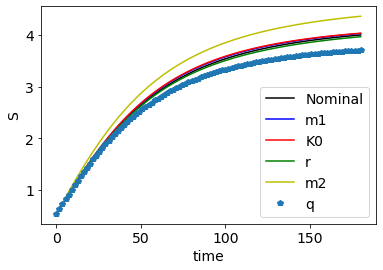

In [69]:
# Distinguish the parameter sensitivity with purtubation by 0.15 in biosurfactant production
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

#m1 = 2.8*10**-2 #1/h
#K0 = 15.7
#r = 4.72*10**-3 #1/h
#m2 = 7.88*10**-3 #1/h
#q = 1.86*10**-3 #1/h

from scipy.integrate import odeint

# Define a function which calculates the derivative
def func(x,t, m1, K0, r, m2, q):    
    P,S = x;
    return [m1*P - (m1/K0)*P**2 - r*P*S, m2*P - q*P*S]


timesteps = np.linspace(0,180,100)
y0 = [7.77,0.54];

# Nominal
y = odeint(func, y0, timesteps, args = (2.8*10**-2,15.7,4.72*10**-3,7.88*10**-3,1.86*10**-3))
# Pertubation by 0.15
y1 = odeint(func, y0, timesteps, args = (2.8*10**-2*1.1,15.7,4.72*10**-3,7.88*10**-3,1.86*10**-3))
y2 = odeint(func, y0, timesteps, args = (2.8*10**-2,15.7*1.1,4.72*10**-3,7.88*10**-3,1.86*10**-3))
y3 = odeint(func, y0, timesteps, args = (2.8*10**-2,15.7,4.72*10**-3*1.1,7.88*10**-3,1.86*10**-3))
y4 = odeint(func, y0, timesteps, args = (2.8*10**-2,15.7,4.72*10**-3,7.88*10**-3*1.1,1.86*10**-3))
y5 = odeint(func, y0, timesteps, args = (2.8*10**-2,15.7,4.72*10**-3,7.88*10**-3,1.86*10**-3*1.1))


# Plot the numerical solution
plt.rcParams.update({'font.size': 14})
plt.xlabel("time")
plt.ylabel("S")
plt.plot(timesteps, y[:,1],'k', label = "Nominal");
plt.plot(timesteps, y1[:,1],'b', label = "m1");
plt.plot(timesteps, y2[:,1],'r', label = "K0");
plt.plot(timesteps, y3[:,1],'g', label = "r");
plt.plot(timesteps, y4[:,1],'y', label = "m2");
plt.plot(timesteps, y5[:,1],'p', label = "q");
plt.legend()

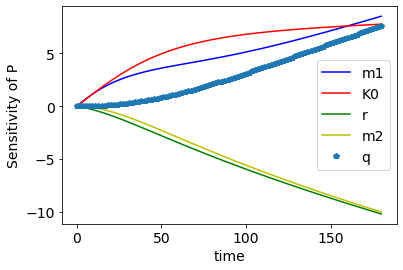

In [70]:
# Local Initial sensitiviy with pertubation by 0.01 in bacteria growth
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("time")
plt.ylabel("Sensitivity of P")
plt.plot(timesteps, ((y1[:,0] - y[:,0])/y[:,0])/0.01,'b', label = "m1");
plt.plot(timesteps, ((y2[:,0] - y[:,0])/y[:,0])/0.01,'r', label = "K0");
plt.plot(timesteps,((y3[:,0] - y[:,0])/y[:,0])/0.01,'g', label = "r");
plt.plot(timesteps,((y4[:,0] - y[:,0])/y[:,0])/0.01,'y', label = "m2");
plt.plot(timesteps,((y5[:,0] - y[:,0])/y[:,0])/0.01,'p', label = "q");
plt.legend()

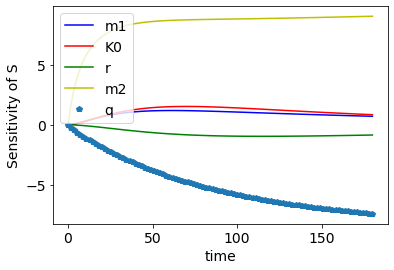

In [71]:
# Local Initial sensitiviy with pertubation by 0.01 in biosurfactant production
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("time")
plt.ylabel("Sensitivity of S")
plt.plot(timesteps, ((y1[:,1] - y[:,1])/y[:,1])/0.01,'b', label = "m1");
plt.plot(timesteps, ((y2[:,1] - y[:,1])/y[:,1])/0.01,'r', label = "K0");
plt.plot(timesteps,((y3[:,1] - y[:,1])/y[:,1])/0.01,'g', label = "r");
plt.plot(timesteps,((y4[:,1] - y[:,1])/y[:,1])/0.01,'y', label = "m2");
plt.plot(timesteps,((y5[:,1] - y[:,1])/y[:,1])/0.01,'p', label = "q");
plt.legend()

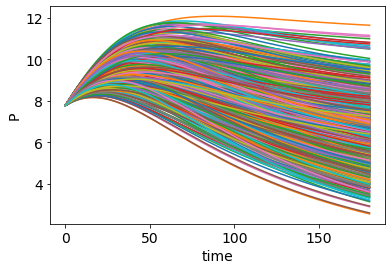

In [75]:
# Global parameter sensitivity of bacteria growth by generating several output for random selections of parameters
N = 1000;
m1 = np.random.uniform(2.8*10**-2*0.8,2.8*10**-2*1.2,N);
K0 = np.random.uniform(15.7*0.8,15.7*1.2,N);
r = np.random.uniform(4.72*10**-3*0.8,4.72*10**-3*1.2,N);
m2 = np.random.uniform(7.88*10**-3*0.8,7.88*10**-3*1.2,N);
q = np.random.uniform(1.86*10**-3*0.8,1.86*10**-3*1.2,N);

P = np.zeros(N);

for m in np.arange(0,N,1):
    output = odeint(func, y0, timesteps, args = (m1[m],K0[m],r[m], m2[m], q[m]));
    plt.plot(timesteps,output[:,0]);
    plt.xlabel("time");
    plt.ylabel("P");
    P[m]=output[-1,0];

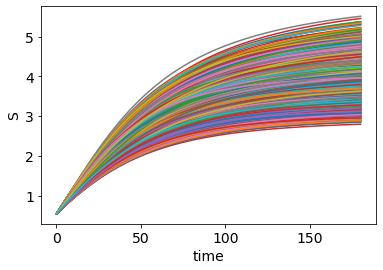

In [76]:
# Global parameter sensitivity of biosurfactant production by generating several output for random selections of parametersparameters
N = 1000;
m1 = np.random.uniform(2.8*10**-2*0.8,2.8*10**-2*1.2,N);
K0 = np.random.uniform(15.7*0.8,15.7*1.2,N);
r = np.random.uniform(4.72*10**-3*0.8,4.72*10**-3*1.2,N);
m2 = np.random.uniform(7.88*10**-3*0.8,7.88*10**-3*1.2,N);
q = np.random.uniform(1.86*10**-3*0.8,1.86*10**-3*1.2,N);

S = np.zeros(N);

for m in np.arange(0,N,1):
    output = odeint(func, y0, timesteps, args = (m1[m],K0[m],r[m], m2[m], q[m]));
    plt.plot(timesteps,output[:,1]);
    plt.xlabel("time");
    plt.ylabel("S");
    S[m]=output[-1,1];

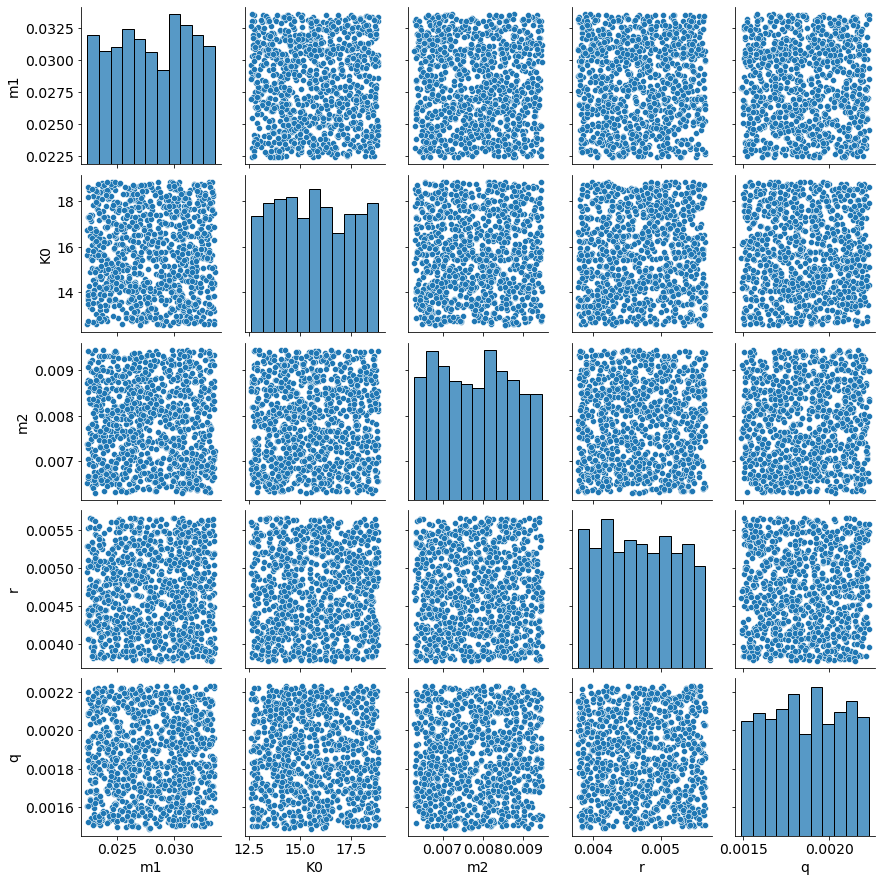

In [77]:
# Plot histograms of sampled parameter space for bacteria growth and biosurfactant production.
import pandas as pd
import seaborn as sns

tmp = {'m1':m1, 'K0':K0, 'm2':m2, 'r':r, 'q':q};
df = pd.DataFrame(tmp);
del(tmp)

sns.pairplot(df)  
20
plt.show()

Our fitted equn is y =  1.8536188831983136 m1 +  -0.04226632701316785 K0 + 1.5547166960050633 r + 17.236445705412926 m2 + -4.565993305736342 q
[ 1.85361888 -0.04226633  1.5547167  17.23644571 -4.56599331]
0.003810831774956225
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.006
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              1.142
Date:                Tue, 13 Dec 2022   Prob (F-statistic):                       0.336
Time:                        12:10:45   Log-Likelihood:                          64.581
No. Observations:                1000   AIC:                                     -119.2
Df Residuals:                     995   BIC:                                     -94.62
Df Model:                           5                                 

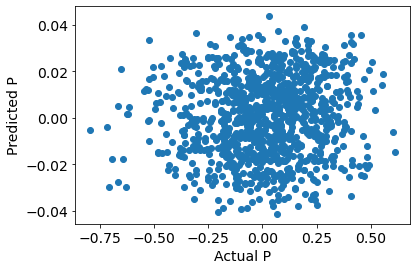

In [78]:
# Normalize bacteria growth and K0
y = (6.5-P)/6.5

# Build X. Normalize values
X = np.c_[(2.8*10**-2 - m1),(15.7 - K0)/15.7,(4.72*10**-3 - r),(7.88*10**-3 - m2),(1.86*10**-3 - q)]

#the linear least squares estimate

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X));

params = tmp @ np.transpose(X) @ y;
print("Our fitted equn is y = ",params[0], "m1 + ", params[1], "K0 +", params[2],"r +", params[3],"m2 +", params[4],"q")

plt.plot(y,X @ params,"o");
plt.ylabel("Predicted P");
plt.xlabel("Actual P");

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = False);
fitted = model.fit(X,y);
print(fitted.coef_)
print(fitted.score(X,y)) # R squared


import statsmodels.api as sm
model = sm.OLS(y, X).fit()
print(model.summary())

X = np.c_[(2.8*10**-2 - m1),(15.7 - K0)/15.7,(4.72*10**-3 - r),(7.88*10**-3 - m2),(1.86*10**-3 - q),(2.8*10**-2 - m1)/2.8*10**-2]
model = sm.OLS(y, X).fit()
print(model.summary())

Our fitted equn is y =  2.9107536624377577 m1 +  0.09296142907089588 K0 + -18.05985336748894 r + 115.59942775523754 m2 + -414.6904124143132 q
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          2.938e+04
Date:                Tue, 13 Dec 2022   Prob (F-statistic):                        0.00
Time:                        12:10:53   Log-Likelihood:                          3059.8
No. Observations:                1000   AIC:                                     -6110.
Df Residuals:                     995   BIC:                                     -6085.
Df Model:                           5                                                  
Covariance Type:            nonrobust                             

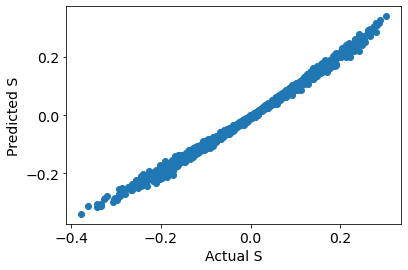

In [79]:
# Normalize biosurfactant production and K0
y = (4-S)/4

# Build X. Normalize values
X = np.c_[(2.8*10**-2 - m1,(15.7 - K0)/15.7,(4.72*10**-3 - r),(7.88*10**-3 - m2),(1.86*10**-3 - q))]


from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X));

params = tmp @ np.transpose(X) @ y;
print("Our fitted equn is y = ",params[0], "m1 + ", params[1], "K0 +", params[2],"r +", params[3],"m2 +", params[4],"q")

plt.plot(y,X @ params,"o");
plt.ylabel("Predicted S");
plt.xlabel("Actual S");

X = np.c_[(2.8*10**-2 - m1),(15.7 - K0)/15.7,(4.72*10**-3 - r),(7.88*10**-3 - m2),(1.86*10**-3 - q),(2.8*10**-2 - m1)/2.8*10**-2]
model = sm.OLS(y, X).fit()
print(model.summary())